In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *

In [2]:
datamr=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series/coviddata_mar.xlsx")
dataap=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_apr.csv")
datamy=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_may.csv")
datajn=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_june.csv")
datajly=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_jly.xlsx")
dataaug=pd.read_excel(r"C:\Users\Mark 1\coviddata_aug.xlsx")

In [3]:
datamr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


In [4]:
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01-Apr,424,2059,19,169,6,53
1,02-Apr,486,2545,22,191,16,69
2,03-Apr,560,3105,39,230,14,83
3,04-Apr,579,3684,56,286,13,96
4,05-Apr,609,4293,43,329,22,118


In [5]:
date=dataap["Date"]
date=list(date)

In [6]:
for i in range(len(date)):
    date[i]=date[i].strip("-Apr")
    

In [7]:
for i in range(len(date)):
    date[i]="2020-04-"+date[i]


In [8]:
dataap["Date"]=date

In [9]:
dataap['Date'] = dataap['Date'].astype('datetime64[ns]') 
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


In [10]:
date=datamy["Date"]
date=list(date)

In [11]:
for i in range(len(date)):
    date[i]=date[i].strip("-May")
    

In [12]:
for i in range(len(date)):
    date[i]="2020-05-"+date[i]


In [13]:
datamy["Date"]=date

In [14]:
datamy['Date'] = datamy['Date'].astype('datetime64[ns]') 
datamy.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


In [15]:
date=datajn["Date"]
date=list(date)

In [16]:
for i in range(len(date)):
    date[i]=date[i].strip("-Jun")
    

In [17]:
for i in range(len(date)):
    date[i]="2020-06-"+date[i]


In [18]:
datajn["Date"]=date

In [19]:
datajn['Date'] = datajn['Date'].astype('datetime64[ns]') 
datajn.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


In [22]:
dt_mrgd=pd.concat([datamr,dataap,datamy,datajn,datajly,dataaug],axis=0)
dt_mrgd = dt_mrgd.loc[:, ~dt_mrgd.columns.str.contains('^Unnamed')]
dt_mrgd.reset_index(inplace = True, drop = True) 
dt_mrgd

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0
...,...,...,...,...,...,...,...
164,2020-08-12,67066,2395485,57759,1695853,950,47150
165,2020-08-13,64141,2459626,54776,1750629,1006,48156
166,2020-08-14,65610,2525236,56920,1807549,989,49145
167,2020-08-15,63986,2589222,53116,1860665,952,50097


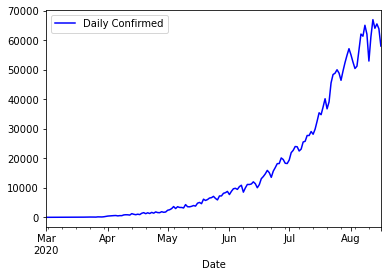

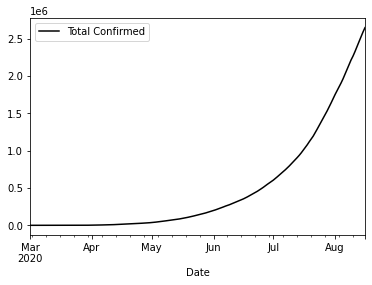

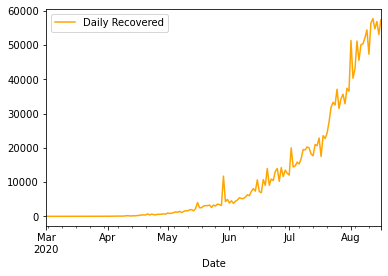

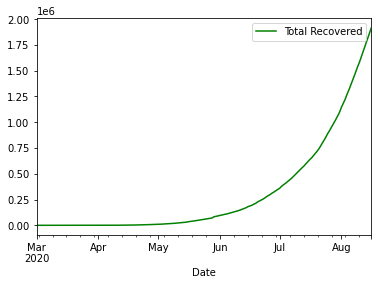

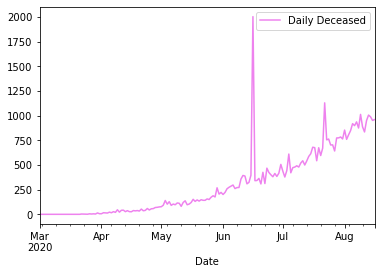

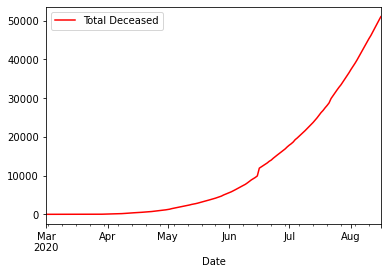

In [23]:
colss=list(dt_mrgd.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    dt_mrgd.plot(x="Date",y=m,color=n)

In [24]:
dt_mrgd_diff=dt_mrgd.copy()
dt_mrgd_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0


In [25]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dt_mrgd_diff.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_diff[i]=list(range(len(dt_mrgd_diff)))
    dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
    for k in range(0,len(dt_mrgd_diff)-1):
        dt_mrgd_diff[i][k+1]=dt_mrgd_diff[j][k+1]-dt_mrgd_diff[j][k]
        

<ipython-input-25-20fe458c53e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
<ipython-input-25-20fe458c53e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][k+1]=dt_mrgd_diff[j][k+1]-dt_mrgd_diff[j][k]


In [26]:
dt_mrgd_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0


In [27]:
dt_mrgd_diff["Total Confirmed"][4]-dt_mrgd_diff["Total Confirmed"][3]==dt_mrgd_diff["Total_Confirmed_Diff"][4]

True

In [28]:
dt_mrgd_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,169.000000,1.690000e+02,169.000000,1.690000e+02,169.000000,169.000000,169.00000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,15663.035503,4.872820e+05,11349.502959,3.089811e+05,302.112426,11592.124260,343.83432,15664.674556,339.668639,11349.520710,5.680473,302.112426
std,19783.032221,6.919380e+05,16124.638848,4.772432e+05,332.984134,14512.412644,1772.92925,19786.275565,2718.414440,16124.626281,190.148450,332.984134
min,0.000000,3.000000e+00,0.000000,3.000000e+00,0.000000,0.000000,-9101.00000,1.000000,-11013.000000,0.000000,-1663.000000,0.000000
25%,871.000000,9.211000e+03,144.000000,1.086000e+03,27.000000,332.000000,-96.00000,871.000000,-131.000000,144.000000,-7.000000,27.000000
50%,6536.000000,1.385370e+05,3280.000000,5.769400e+04,152.000000,4023.000000,58.00000,6536.000000,6.000000,3280.000000,1.000000,152.000000
75%,23147.000000,6.978490e+05,15829.000000,4.248950e+05,479.000000,19703.000000,877.00000,23147.000000,640.000000,15829.000000,19.000000,479.000000
max,67066.000000,2.647330e+06,57759.000000,1.918069e+06,2004.000000,51057.000000,8236.00000,67066.000000,14814.000000,57759.000000,1608.000000,2004.000000


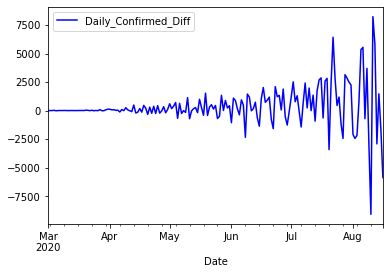

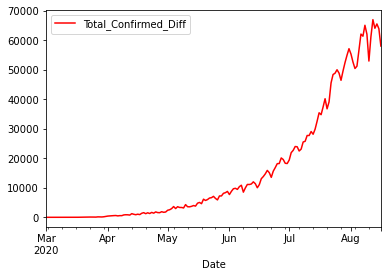

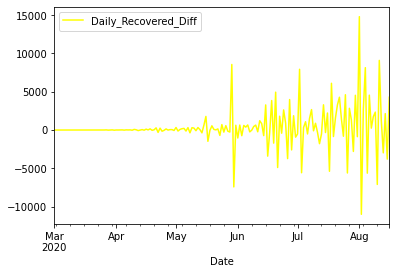

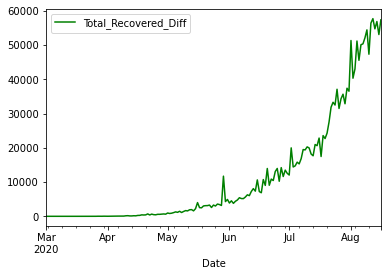

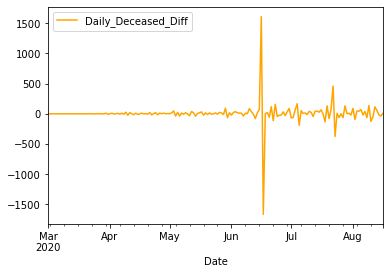

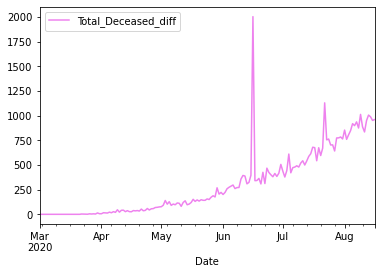

In [29]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_diff.plot(x="Date",y=i,color=j)

In [30]:
dt_mrgd_diff

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2020-08-12,67066,2395485,57759,1695853,950,47150,5814,67066,1298,57759,115,950
165,2020-08-13,64141,2459626,54776,1750629,1006,48156,-2925,64141,-2983,54776,56,1006
166,2020-08-14,65610,2525236,56920,1807549,989,49145,1469,65610,2144,56920,-17,989
167,2020-08-15,63986,2589222,53116,1860665,952,50097,-1624,63986,-3804,53116,-37,952


In [31]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dt_mrgd_diff[dt_mrgd_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dt_mrgd_diff[dt_mrgd_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dt_mrgd_diff[dt_mrgd_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



In [32]:
dt_mrgd_ratio=dt_mrgd[22:].copy()
dt_mrgd_ratio.reset_index(inplace = True, drop = True)
dt_mrgd_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-23,94,497,2,25,2,9
1,2020-03-24,74,571,15,40,1,10
2,2020-03-25,86,657,3,43,1,11
3,2020-03-26,73,730,7,50,5,16
4,2020-03-27,153,883,25,75,3,19


In [33]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dt_mrgd_ratio.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_ratio[i]=list(range(len(dt_mrgd_ratio)))
    dt_mrgd_ratio[i][0]=1
    tmp=[]
    tmp.append(dt_mrgd_ratio[i][0])
    for k in range(0,len(dt_mrgd_ratio)-1):
        tmp.append(round(dt_mrgd_ratio[j][k+1]/dt_mrgd_ratio[j][k],2))
    dt_mrgd_ratio[i]=tmp
dt_mrgd_ratio.head()
        

<ipython-input-33-cb91132e2a8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.00,1.00,1.00,1.00,1.0,1.00
1,2020-03-24,74,571,15,40,1,10,0.79,1.15,7.50,1.60,0.5,1.11
2,2020-03-25,86,657,3,43,1,11,1.16,1.15,0.20,1.08,1.0,1.10
3,2020-03-26,73,730,7,50,5,16,0.85,1.11,2.33,1.16,5.0,1.45
4,2020-03-27,153,883,25,75,3,19,2.10,1.21,3.57,1.50,0.6,1.19


In [34]:
round(dt_mrgd_ratio["Total Confirmed"][4]/dt_mrgd_ratio["Total Confirmed"][3],2)==dt_mrgd_ratio["Total_Confirmed_Ratio"][4]

True

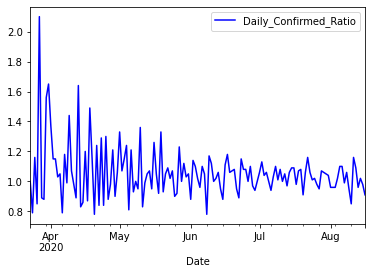

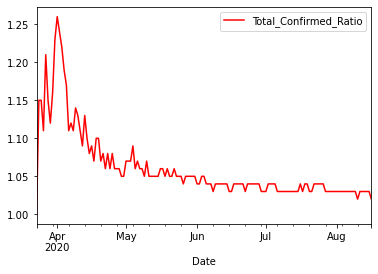

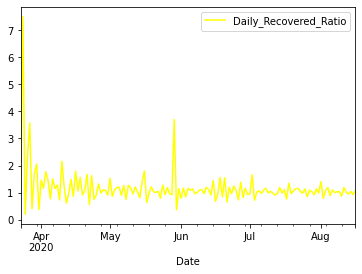

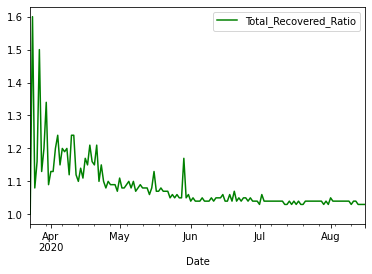

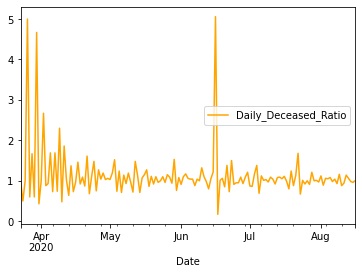

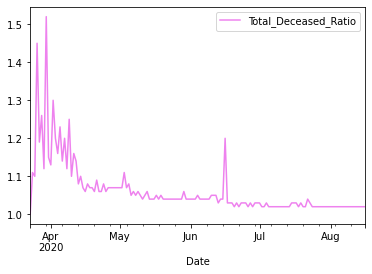

In [35]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_ratio.plot(x="Date",y=i,color=j)

In [36]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dt_mrgd_ratio.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_ratio[i]=list(range(len(dt_mrgd_ratio)))
    dt_mrgd_ratio[i][0]=1
    tmp=[]
    tmp.append(dt_mrgd_ratio[i][0])
    for k in range(0,len(dt_mrgd_ratio)-1):
        tmp.append(dt_mrgd_ratio[j][k+1]/dt_mrgd_ratio[j][k])
    dt_mrgd_ratio[i]=tmp
dt_mrgd_ratio.head()
        

<ipython-input-36-ba3f6f7cd61a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
1,2020-03-24,74,571,15,40,1,10,0.787234,1.148893,7.500000,1.600000,0.5,1.111111
2,2020-03-25,86,657,3,43,1,11,1.162162,1.150613,0.200000,1.075000,1.0,1.100000
3,2020-03-26,73,730,7,50,5,16,0.848837,1.111111,2.333333,1.162791,5.0,1.454545
4,2020-03-27,153,883,25,75,3,19,2.095890,1.209589,3.571429,1.500000,0.6,1.187500


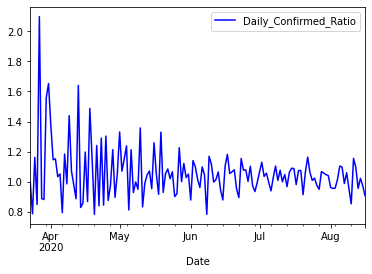

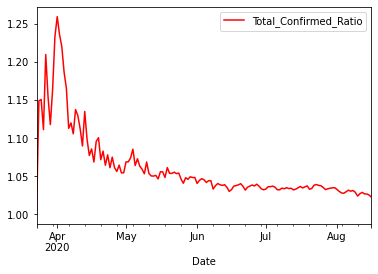

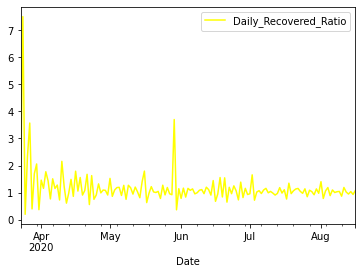

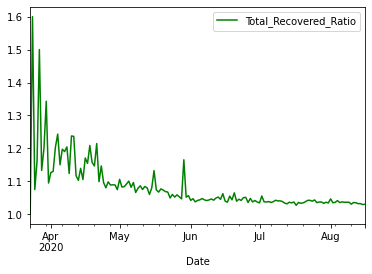

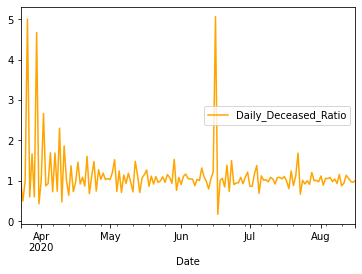

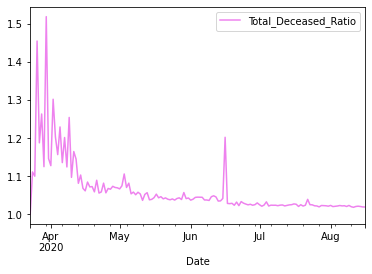

In [37]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_ratio.plot(x="Date",y=i,color=j)

In [38]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dt_mrgd_ratio[dt_mrgd_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dt_mrgd_ratio[dt_mrgd_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dt_mrgd_ratio[dt_mrgd_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]





In [39]:
datamr.reset_index(inplace = True, drop = True)
datamr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


In [40]:

dataap.reset_index(inplace = True, drop = True)
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


In [41]:

datamy.reset_index(inplace = True, drop = True)
datamy.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


In [42]:

datajn.reset_index(inplace = True, drop = True)
datajn.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


In [43]:
tc_mean_list=[]
tr_mean_list=[]
td_mean_list=[]

In [44]:
tc_mean_list.append(datamr["Total Confirmed"][len(datamr)-1]/len(datamr))
tc_mean_list.append(dataap["Total Confirmed"][len(dataap)-1]/len(dataap))
tc_mean_list.append(datamy["Total Confirmed"][len(datamy)-1]/len(datamy))
tc_mean_list.append(datajn["Total Confirmed"][len(datajn)-1]/len(datajn))
tc_mean_list.append(datajly["Total Confirmed"][len(datajly)-1]/len(datajly))
#tc_mean_list.append(dataaug["Total Confirmed"][len(dataaug)-1]/len(dataaug))


tr_mean_list.append(datamr["Total Recovered"][len(datamr)-1]/len(datamr))
tr_mean_list.append(dataap["Total Recovered"][len(dataap)-1]/len(dataap))
tr_mean_list.append(datamy["Total Recovered"][len(datamy)-1]/len(datamy))
tr_mean_list.append(datajn["Total Recovered"][len(datajn)-1]/len(datajn))
tr_mean_list.append(datajly["Total Recovered"][len(datajly)-1]/len(datajly))
#tr_mean_list.append(dataaug["Total Recovered"][len(dataaug)-1]/len(dataaug))

td_mean_list.append(datamr["Total Deceased"][len(datamr)-1]/len(datamr))
td_mean_list.append(dataap["Total Deceased"][len(dataap)-1]/len(dataap))
td_mean_list.append(datamy["Total Deceased"][len(datamy)-1]/len(datamy))
td_mean_list.append(datajn["Total Deceased"][len(datajn)-1]/len(datajn))
td_mean_list.append(datajly["Total Deceased"][len(datajly)-1]/len(datajly))
#td_mean_list.append(dataaug["Total Deceased"][len(dataaug)-1]/len(dataaug))


In [45]:
mean_data={"month":["March","Aptil","May","June","July"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31"],"tc_mean":tc_mean_list,"tr_mean":tr_mean_list,"td_mean":td_mean_list}

In [46]:
mean_dataf=pd.DataFrame(mean_data)
mean_dataf['month_end'] = mean_dataf['month_end'].astype('datetime64[ns]') 
mean_dataf

,month,month_end,tc_mean,tr_mean,td_mean
0,March,2020-03-31,52.741935,4.838710,1.516129
1,Aptil,2020-04-30,1162.200000,301.966667,38.466667
2,May,2020-05-31,6149.967742,2963.290323,174.387097
3,June,2020-06-30,19526.500000,11594.666667,580.366667
4,July,2020-07-31,54735.290323,35339.935484,1179.548387


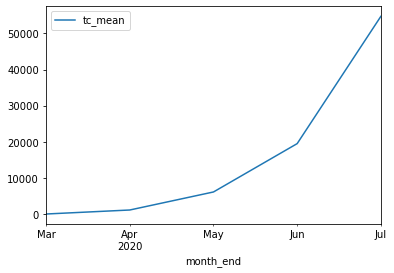

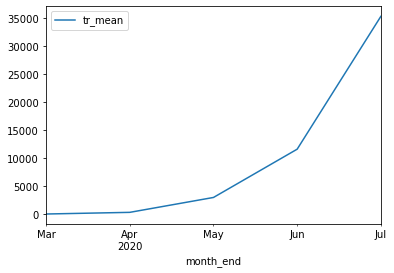

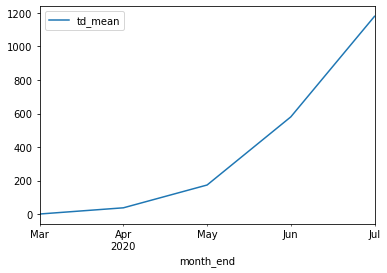

In [47]:
colls=list(mean_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    mean_dataf.plot(x="month_end",y=i)

In [48]:
dc_mean_list=[]
dr_mean_list=[]
dd_mean_list=[]

In [49]:
dc_mean_list.append(datamr["Daily Confirmed"][len(datamr)-1]/len(datamr))
dc_mean_list.append(dataap["Daily Confirmed"][len(dataap)-1]/len(dataap))
dc_mean_list.append(datamy["Daily Confirmed"][len(datamy)-1]/len(datamy))
dc_mean_list.append(datajn["Daily Confirmed"][len(datajn)-1]/len(datajn))
dc_mean_list.append(datajly["Daily Confirmed"][len(datajly)-1]/len(datajly))
#dc_mean_list.append(dataaug["Daily Confirmed"][len(dataaug)-1]/len(dataaug))


dr_mean_list.append(datamr["Daily Recovered"][len(datamr)-1]/len(datamr))
dr_mean_list.append(dataap["Daily Recovered"][len(dataap)-1]/len(dataap))
dr_mean_list.append(datamy["Daily Recovered"][len(datamy)-1]/len(datamy))
dr_mean_list.append(datajn["Daily Recovered"][len(datajn)-1]/len(datajn))
dr_mean_list.append(datajly["Daily Recovered"][len(datajly)-1]/len(datajly))
#dr_mean_list.append(dataaug["Daily Recovered"][len(dataaug)-1]/len(dataaug))

dd_mean_list.append(datamr["Daily Deceased"][len(datamr)-1]/len(datamr))
dd_mean_list.append(dataap["Daily Deceased"][len(dataap)-1]/len(dataap))
dd_mean_list.append(datamy["Daily Deceased"][len(datamy)-1]/len(datamy))
dd_mean_list.append(datajn["Daily Deceased"][len(datajn)-1]/len(datajn))
dd_mean_list.append(datajly["Daily Deceased"][len(datajly)-1]/len(datajly))
#dd_mean_list.append(dataaug["Daily Deceased"][len(dataaug)-1]/len(dataaug))


In [50]:
dmean_data={"month":["March","Aptil","May","June","July"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31"],"dc_mean":dc_mean_list,"dr_mean":dr_mean_list,"dd_mean":dd_mean_list}

In [51]:
dmean_dataf=pd.DataFrame(dmean_data)
dmean_dataf['month_end'] = dmean_dataf['month_end'].astype('datetime64[ns]') 
dmean_dataf

,month,month_end,dc_mean,dr_mean,dd_mean
0,March,2020-03-31,9.967742,0.419355,0.193548
1,Aptil,2020-04-30,60.033333,21.000000,2.500000
2,May,2020-05-31,283.516129,158.967742,7.161290
3,June,2020-06-30,608.533333,418.833333,16.866667
4,July,2020-07-31,1845.548387,1179.161290,24.645161


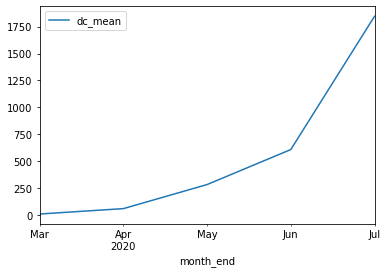

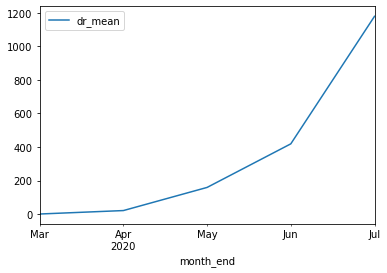

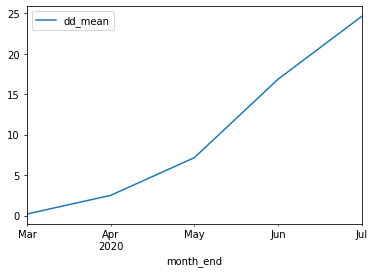

In [52]:
colls=list(dmean_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    dmean_dataf.plot(x="month_end",y=i)